In [1]:
!sudo apt-get install -y fonts-nanum #코랩 한글 폰트 꺠짐 방지 폰트 설치
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (6,483 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155229 files and d

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# 한국어 출력
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath,size=9)
plt.rc('font',family='NanumBarunGothic')


In [16]:
df = pd.read_csv('/content/drive/MyDrive/final_project/final_df.csv',index_col=0)
df.reset_index(inplace=True)
del df['index']
df

,name,headline,date,change,token_mecab
0,삼성전자,"[TV] 재계 총수들, 일자리 창출과 투자 확대 강조",2012-01-02,1,TV 재계 총수 일자리 창출 투자 확대 강조
1,셀트리온,"코스닥, 새해 첫 거래일 소폭 오름세 지속",2012-01-02,0,코스닥 새해 거래일 소폭 오름세 지속
2,셀트리온,코스닥 새해 첫 거래일 소폭 오름세 지속,2012-01-02,0,코스닥 새해 거래일 소폭 오름세 지속
3,셀트리온,"코스닥, 개인·기관 '사자'에 상승 지속…저출산株 강세",2012-01-02,0,코스닥 개인 기관 사자 상승 지속 저출산 종목 강세
4,셀트리온,"코스피, 외인 '팔자'에 약세 전환…방향성 탐색",2012-01-02,0,코스피 외인 팔자 약세 전환 방향 탐색
...,...,...,...,...,...
233699,SK하이닉스,"""코로나 봉쇄로 삼성 시안공장 생산 줄여…메모리 공급사 주가에는 긍정적 영향""",2021-12-30,1,코로나 봉쇄 삼성 시안 공장 생산 메모리 공급 주가 긍정 영향
233700,SK하이닉스,"SK하이닉스, 인텔 낸드 1단계 인수",2021-12-30,1,SK 하이닉스 인텔 낸드 단계 인수
233701,SK하이닉스,"SK하이닉스, 특별성과급 300% 쏜다",2021-12-30,1,SK 하이닉스 특별
233702,셀트리온,"삼성바이오로직스-셀트리온, 바이오 대장주 희비",2021-12-30,0,삼성 바이오 로직스 트리 장주 희비


## mecab으로 token이 잡히지 않은 기사 확인(결측치 확인)
- 사진 관련 기사나 헤드라인의 길이가 짧은 경우 결측치로 확인됨
- 총 31개로 기사 데이터 삭제 후 진행

In [17]:
print(len(df[df.token_mecab.isnull()]))
df[df.token_mecab.isnull()].tail(20)

31


,name,headline,date,change,token_mecab
50794,카카오,돈으로 사야만 가질 수 있나요?,2014-03-11,0,NaN
51151,KB금융,V,2014-03-17,0,NaN
55491,NAVER,"수공 ""2017년까지 빚 36% 줄일 것""",2014-05-26,0,NaN
56381,현대차,"원高, 피할 수 없다면 즐겨볼까",2014-06-10,0,NaN
62936,NAVER,비슷하면 지는 거다,2014-09-17,1,NaN
80646,LG화학,"한경硏 ""엔저 2~3년 더 간다""",2015-05-29,0,NaN
81929,KB금융,"돈? 안 생겨요, 돈 있어야 돈 버는걸요",2015-06-16,0,NaN
84305,NAVER,"일, 삶의 빛인가 짐인가",2015-07-20,1,NaN
93929,현대차,‘더 깨끗하고 더 똑똑한’ 차들이 온다,2015-11-19,1,NaN
100476,카카오,"살(買)것인가, 살(居)것인가",2016-02-25,0,NaN


In [18]:
df = df[df.token_mecab.isnull()==False]
df.head()

,name,headline,date,change,token_mecab
0,삼성전자,"[TV] 재계 총수들, 일자리 창출과 투자 확대 강조",2012-01-02,1,TV 재계 총수 일자리 창출 투자 확대 강조
1,셀트리온,"코스닥, 새해 첫 거래일 소폭 오름세 지속",2012-01-02,0,코스닥 새해 거래일 소폭 오름세 지속
2,셀트리온,코스닥 새해 첫 거래일 소폭 오름세 지속,2012-01-02,0,코스닥 새해 거래일 소폭 오름세 지속
3,셀트리온,"코스닥, 개인·기관 '사자'에 상승 지속…저출산株 강세",2012-01-02,0,코스닥 개인 기관 사자 상승 지속 저출산 종목 강세
4,셀트리온,"코스피, 외인 '팔자'에 약세 전환…방향성 탐색",2012-01-02,0,코스피 외인 팔자 약세 전환 방향 탐색


In [19]:
# 정렬된 date에서 train과 test split 진행 (기준은 2020년 1월 1일)
df['date'] = pd.to_datetime(df['date'])
train = df[df['date'] < pd.to_datetime('2020-01-01')]
test = df[df['date'] >= pd.to_datetime('2020-01-01')]
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188501 entries, 0 to 188529
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   name         188501 non-null  object        
 1   headline     188501 non-null  object        
 2   date         188501 non-null  datetime64[ns]
 3   change       188501 non-null  int64         
 4   token_mecab  188501 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 8.6+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 45172 entries, 188530 to 233703
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   name         45172 non-null  object        
 1   headline     45172 non-null  object        
 2   date         45172 non-null  datetime64[ns]
 3   change       45172 non-null  int64         
 4   token_mecab  45172 non-null  object        
dtypes: dateti

(None, None)

- 약 19만 : 4.5만으로 8:2 비율로 train,test를 분리한다.

## 벡터화 & 모델링 작업 baseline

In [20]:
train.reset_index(inplace=True)
test.reset_index(inplace=True)
del train['index']
del test['index']
train.head()

,name,headline,date,change,token_mecab
0,삼성전자,"[TV] 재계 총수들, 일자리 창출과 투자 확대 강조",2012-01-02,1,TV 재계 총수 일자리 창출 투자 확대 강조
1,셀트리온,"코스닥, 새해 첫 거래일 소폭 오름세 지속",2012-01-02,0,코스닥 새해 거래일 소폭 오름세 지속
2,셀트리온,코스닥 새해 첫 거래일 소폭 오름세 지속,2012-01-02,0,코스닥 새해 거래일 소폭 오름세 지속
3,셀트리온,"코스닥, 개인·기관 '사자'에 상승 지속…저출산株 강세",2012-01-02,0,코스닥 개인 기관 사자 상승 지속 저출산 종목 강세
4,셀트리온,"코스피, 외인 '팔자'에 약세 전환…방향성 탐색",2012-01-02,0,코스피 외인 팔자 약세 전환 방향 탐색


In [21]:
test.head()

,name,headline,date,change,token_mecab
0,카카오,"""기술 사대주의로는 AI 정복 힘들다""",2020-01-02,0,기술 사대주의 AI 정복 힘들
1,카카오,[해설]中 디지털 종속 우려...동남아 국가 '中 QR결제 금지' 초강수,2020-01-02,0,해설 중국 디지털 종속 우려 동남아 국가 중국 QR 결제 금지 강수
2,카카오,"씨티은행, 1.3%포인트 금리인하 직장인 신용대출..한달 연장 이벤트",2020-01-02,0,씨티 은행 포인트 금리 인하 직장 신용 대출 연장 이벤트
3,카카오,'소비자분쟁 통지서' 카톡으로 제공된다,2020-01-02,0,소비자 분쟁 통지서 카톡 제공
4,카카오,[이슈분석]키 잡은 공정위…배민-DH 합병 경우의 수,2020-01-02,0,이슈 분석 공정위 배민 DH 합병 경우


---

In [32]:
def get_freq_count(tokens):
  pos_token = tokens[train['change'] == 1].str.split(" ")
  neg_token = tokens[train['change'] == 0].str.split(" ")
  pos_freq = pd.Series(np.concatenate([w for w in pos_token])).value_counts()
  neg_freq = pd.Series(np.concatenate([w for w in neg_token])).value_counts()
  return pos_freq, neg_freq

def remove_doubled_words(pos_freq, neg_freq, tokens):
  #긍정,부정에서 모두 사용되는 단어는 의미 없는 단어이므로 제거해줍니다.
  top_50_pos = pos_freq[:50]
  top_50_neg = neg_freq[:50]
  remove_words = [p for p in top_50_pos.index if p in top_50_neg.index]
  tokens_removed = remove_stop_words(tokens, remove_words)
  final_tokens = cleaning_tokens(tokens_removed)
  return final_tokens

def draw_top_hist(data,name,color): #히스토그램을 그려줍니다.
  top_10 = data[:10]
  plt.figure(figsize=(12,7.5))
  plt.suptitle("Bar Plot", fontsize=30)
  plt.title(name, fontsize=15)
  plt.bar(top_10.index,top_10.values, width=0.5, color= color, alpha=0.5)
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
  plt.show()

tokens = train['token_mecab']
pos_freq, neg_freq = get_freq_count(tokens)

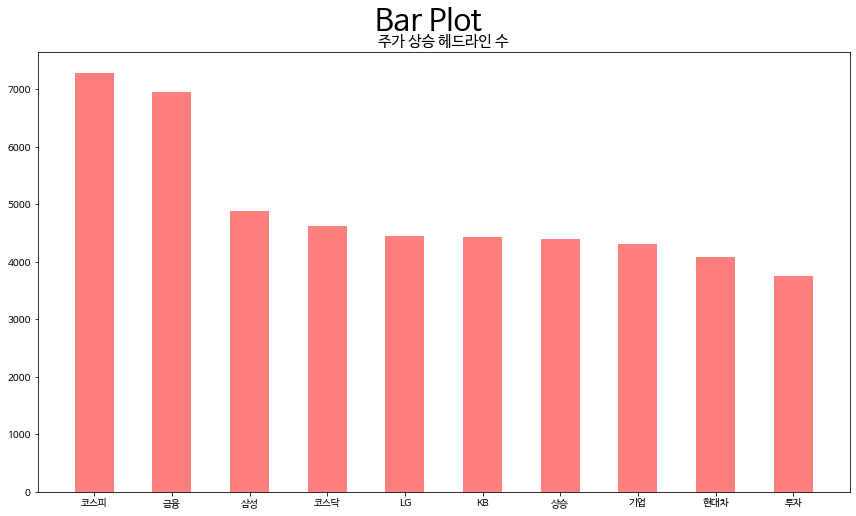

In [33]:
draw_top_hist(pos_freq,'주가 상승 헤드라인 수','r')

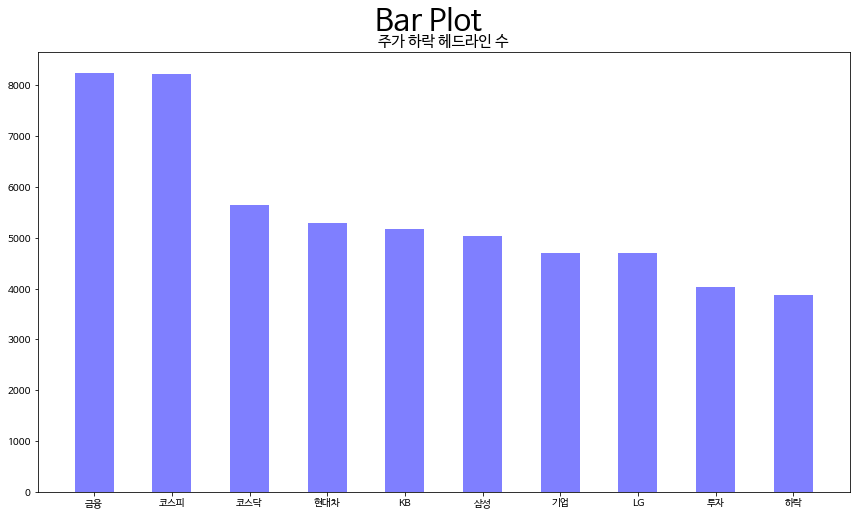

In [34]:
draw_top_hist(neg_freq,'주가 하락 헤드라인 수','b')

In [35]:
top_10_pos = pos_freq[:10]
top_10_neg = neg_freq[:10]
common_words = [p for p in top_10_pos.index if p in top_10_neg.index]
common_words

['코스피', '금융', '삼성', '코스닥', 'LG', 'KB', '기업', '현대차', '투자']

- 상위 10위에 공동으로 존재하는 토큰들은 전부 제거

In [38]:
total = pos_freq.sum() + neg_freq.sum()
common_words_cnt = (pos_freq[common_words].sum() + neg_freq[common_words].sum()) // 2
print(f'total words count: {total} removed: {common_words_cnt} ratio: {common_words_cnt / total :.2f}')

total words count: 1255432 removed: 47885 ratio: 0.04


- 전체 단어 사용 횟수 중 4% 정도의 빈도수가 겹치는 공통어
- 이 공통어들을 불용어로 처리해 제거

In [42]:
clean_token_list = []
tokens = tokens.str.split(" ")
for token in tokens:
  clean_token = list(filter(lambda x: x not in common_words,token))
  clean_token_list.append(clean_token)

In [43]:
clean_tokens = pd.Series(clean_token_list)
clean_tokens[:10]

0         [TV, 재계, 총수, 일자리, 창출, 확대, 강조]
1                [새해, 거래일, 소폭, 오름세, 지속]
2                [새해, 거래일, 소폭, 오름세, 지속]
3     [개인, 기관, 사자, 상승, 지속, 저출산, 종목, 강세]
4              [외인, 팔자, 약세, 전환, 방향, 탐색]
5                        [거래일, 상승세, 상승]
6                 [새해, 거래일, 개인, 매수, 상승]
7    [IR, 장영, 실상, 화학, 장갑, 소재, NBR, 라텍스]
8               [주목, CEO, 김반석, 화학, 부회장]
9                         [정유, 화학주, 하락]
dtype: object

In [44]:
train['clean_tokens'] = clean_token_list
train.head(3)

,name,headline,date,change,token_mecab,clean_tokens
0,삼성전자,"[TV] 재계 총수들, 일자리 창출과 투자 확대 강조",2012-01-02,1,TV 재계 총수 일자리 창출 투자 확대 강조,"[TV, 재계, 총수, 일자리, 창출, 확대, 강조]"
1,셀트리온,"코스닥, 새해 첫 거래일 소폭 오름세 지속",2012-01-02,0,코스닥 새해 거래일 소폭 오름세 지속,"[새해, 거래일, 소폭, 오름세, 지속]"
2,셀트리온,코스닥 새해 첫 거래일 소폭 오름세 지속,2012-01-02,0,코스닥 새해 거래일 소폭 오름세 지속,"[새해, 거래일, 소폭, 오름세, 지속]"


In [45]:
common_words

['코스피', '금융', '삼성', '코스닥', 'LG', 'KB', '기업', '현대차', '투자']

In [46]:
# 상위 공통 10개 제거 후 다시 진행
def get_freq_count2(tokens):
  pos_token = list(train['clean_tokens'][train['change'] == 1])
  neg_token = list(train['clean_tokens'][train['change'] == 0])
  pos_freq = pd.Series(np.concatenate([w for w in pos_token])).value_counts()
  neg_freq = pd.Series(np.concatenate([w for w in neg_token])).value_counts()
  return pos_freq, neg_freq

In [47]:
pos_freq,neg_freq = get_freq_count2(clean_tokens)

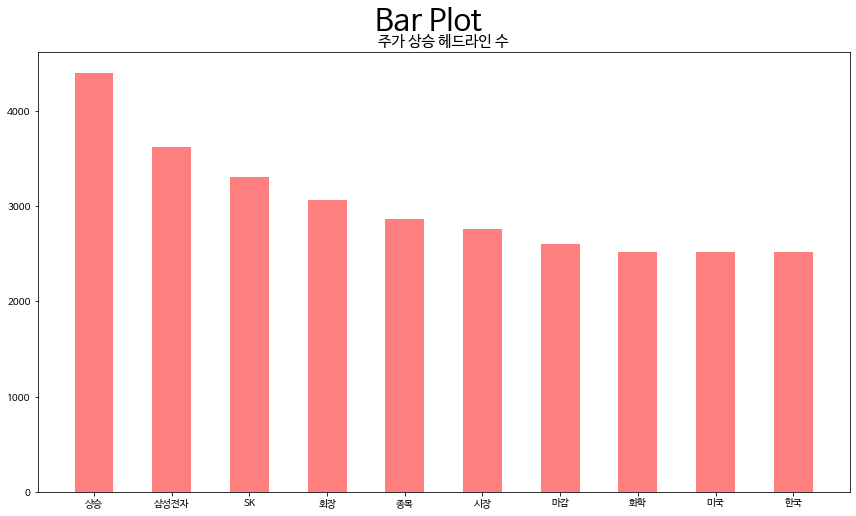

In [48]:
draw_top_hist(pos_freq,'주가 상승 헤드라인 수','r')

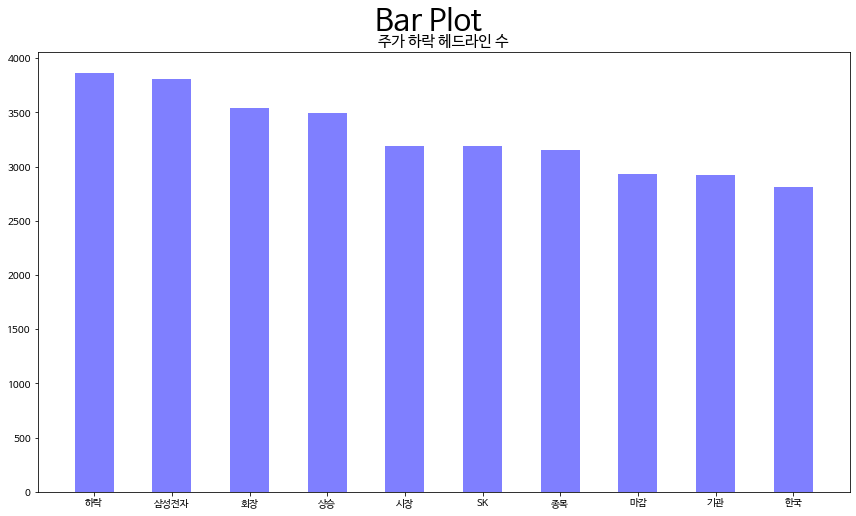

In [49]:
draw_top_hist(neg_freq,'주가 하락 헤드라인 수','b')

In [71]:
from collections import Counter

clean_words = []; mecab_words = []
for idx, row in train.iterrows():
  clean_words.extend(row['clean_tokens'])
  mecab_words.extend(row['token_mecab'].split(" "))

In [73]:
print("train에 사용된 clean 단어 총 횟수(중복 포함) : ",len(clean_words))
print("train에 사용된 mecab 단어 총 횟수(중복 포함) : ",len(mecab_words))

train에 사용된 clean 단어 총 횟수(중복 포함) :  1159661
train에 사용된 mecab 단어 총 횟수(중복 포함) :  1255432


In [74]:
cnt1 = Counter(mecab_words)
cnt2 = Counter(clean_words)
frequencies1 = pd.Series(cnt1)
frequencies2 = pd.Series(cnt2)

print(f"mecab Words kinds: {len(frequencies1)}")
print(f"clean Words kinds: {len(frequencies2)}")

mecab Words kinds: 36018
clean Words kinds: 36009


### 한번 더 상위 10개의 공동 토큰 제거
- 아직까지 공통 토큰들이 보인다 한번 더 제거

In [75]:
top_10_pos2 = pos_freq[:10]
top_10_neg2 = neg_freq[:10]
common_words = [p for p in top_10_pos2.index if p in top_10_neg2.index]
common_words = common_words[1:] # 상승은 중요한 단어 -> 주가 변동이 상승일 때
common_words

['삼성전자', 'SK', '회장', '종목', '시장', '마감', '한국']

In [77]:
total = frequencies2.sum()
common_words_cnt = frequencies2[common_words].sum()
print(f'total words count: {total} removed: {common_words_cnt} ratio: {common_words_cnt / total :.2f}')

total words count: 1159661 removed: 43350 ratio: 0.04


In [78]:
clean_token_list2 = []
for token in clean_tokens:
  clean_token = list(filter(lambda x: x not in common_words,token))
  clean_token_list2.append(clean_token)

In [79]:
clean_tokens2 = pd.Series(clean_token_list2)
clean_tokens2[:10]

0         [TV, 재계, 총수, 일자리, 창출, 확대, 강조]
1                [새해, 거래일, 소폭, 오름세, 지속]
2                [새해, 거래일, 소폭, 오름세, 지속]
3         [개인, 기관, 사자, 상승, 지속, 저출산, 강세]
4              [외인, 팔자, 약세, 전환, 방향, 탐색]
5                        [거래일, 상승세, 상승]
6                 [새해, 거래일, 개인, 매수, 상승]
7    [IR, 장영, 실상, 화학, 장갑, 소재, NBR, 라텍스]
8               [주목, CEO, 김반석, 화학, 부회장]
9                         [정유, 화학주, 하락]
dtype: object

In [81]:
train['clean_tokens2'] = clean_token_list2 # 최종 clean_token_list 추가
train.head(3)

,name,headline,date,change,token_mecab,clean_tokens,clean_tokens2
0,삼성전자,"[TV] 재계 총수들, 일자리 창출과 투자 확대 강조",2012-01-02,1,TV 재계 총수 일자리 창출 투자 확대 강조,"[TV, 재계, 총수, 일자리, 창출, 확대, 강조]","[TV, 재계, 총수, 일자리, 창출, 확대, 강조]"
1,셀트리온,"코스닥, 새해 첫 거래일 소폭 오름세 지속",2012-01-02,0,코스닥 새해 거래일 소폭 오름세 지속,"[새해, 거래일, 소폭, 오름세, 지속]","[새해, 거래일, 소폭, 오름세, 지속]"
2,셀트리온,코스닥 새해 첫 거래일 소폭 오름세 지속,2012-01-02,0,코스닥 새해 거래일 소폭 오름세 지속,"[새해, 거래일, 소폭, 오름세, 지속]","[새해, 거래일, 소폭, 오름세, 지속]"


### 최종 주가 변동별 단어 등장 빈도수 확인


In [82]:
def get_freq_count3(tokens):
  pos_token = list(train['clean_tokens2'][train['change'] == 1])
  neg_token = list(train['clean_tokens2'][train['change'] == 0])
  pos_freq = pd.Series(np.concatenate([w for w in pos_token])).value_counts()
  neg_freq = pd.Series(np.concatenate([w for w in neg_token])).value_counts()
  return pos_freq, neg_freq

In [83]:
pos_freq,neg_freq = get_freq_count3(clean_tokens2)

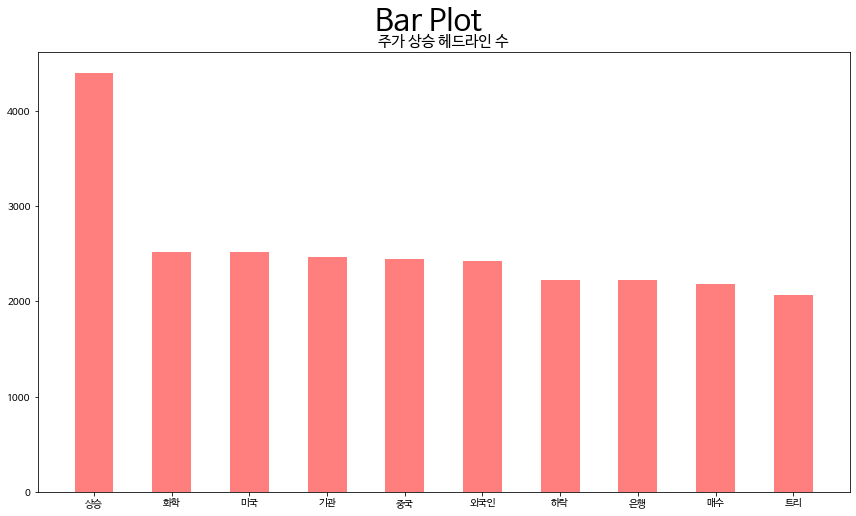

In [84]:
draw_top_hist(pos_freq,'주가 상승 헤드라인 수','r')

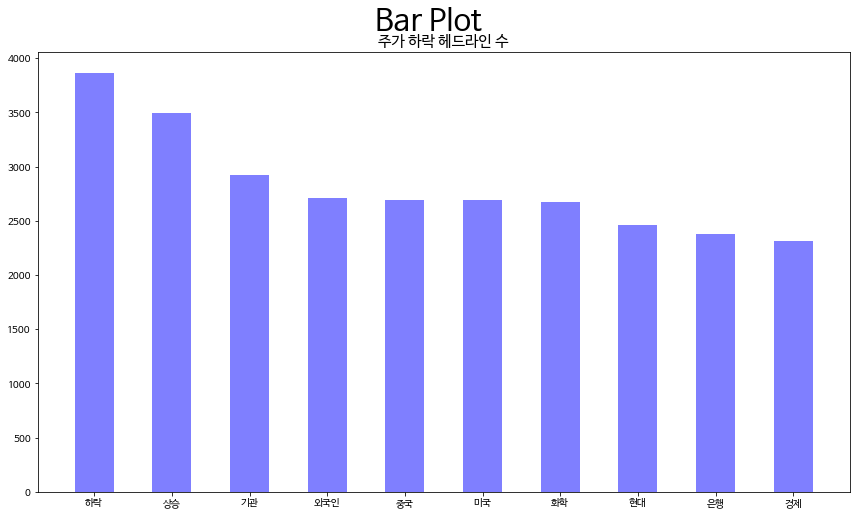

In [85]:
draw_top_hist(neg_freq,'주가 하락 헤드라인 수','b')

In [86]:
clean2_words = []
for idx, row in train.iterrows():
  clean2_words.extend(row['clean_tokens2'])

In [87]:
print("train에 사용된 mecab 단어 총 사용 횟수(중복 포함) : ",len(mecab_words))
print("train에 사용된 clean 단어 총 사용 횟수(중복 포함) : ",len(clean_words))
print("train에 사용된 clean2 단어 총 사용 횟수(중복 포함) : ",len(clean2_words))

train에 사용된 mecab 단어 총 사용 횟수(중복 포함) :  1255432
train에 사용된 clean 단어 총 사용 횟수(중복 포함) :  1159661
train에 사용된 clean2 단어 총 사용 횟수(중복 포함) :  1116311


In [88]:
#cnt1 = Counter(mecab_words)
#cnt2 = Counter(clean_words)
cnt3 = Counter(clean2_words)

#frequencies1 = pd.Series(cnt1)
#frequencies2 = pd.Series(cnt2)
frequencies3 = pd.Series(cnt3)

print(f"mecab Words kinds: {len(frequencies1)}")
print(f"clean Words kinds: {len(frequencies2)}")
print(f"clean2 Words Kinds: {len(frequencies3)}")

mecab Words kinds: 36018
clean Words kinds: 36009
clean2 Words Kinds: 36002


- 기존 mecab에서 상위 10개의 공통 *2 중 16개의 단어를 제거

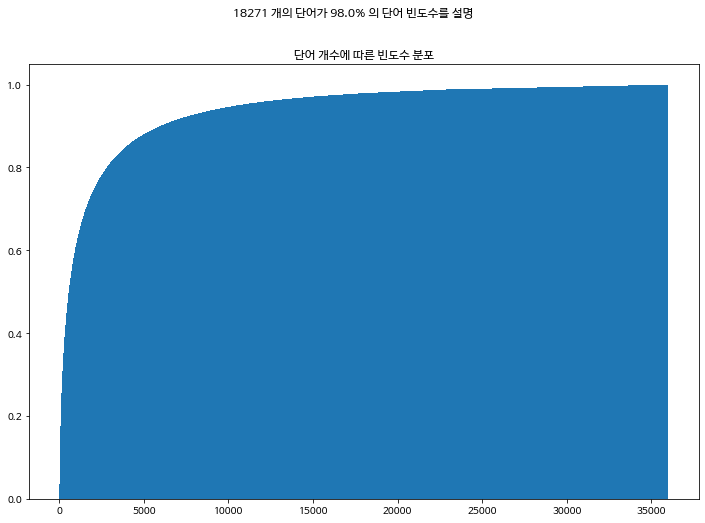

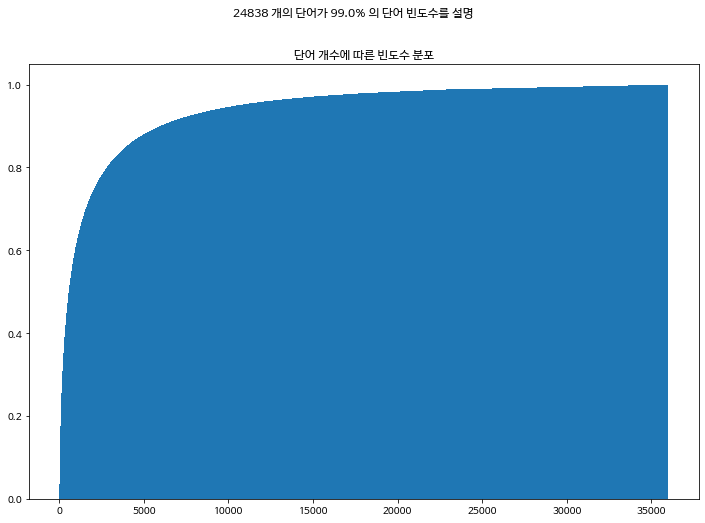

In [89]:
for rate in [0.98, 0.99]:
    clean_frequencies = pd.Series(np.concatenate([w for w in clean_tokens2])).value_counts()
    accumulate_words = np.add.accumulate(clean_frequencies) # 빈도수의 누적합을 구해줍니다.
    ratio = rate
    words_cnt = np.where(accumulate_words > sum(clean_frequencies) * rate)[0][0]
    plt.figure(figsize=(12,8))
    plt.bar(range(0,len(clean_frequencies)), accumulate_words / sum(clean_frequencies), width=1.0) # 전체 단어와 현재까지의 빈도수의 비율을 구해줍니다.
    plt.title('단어 개수에 따른 빈도수 분포')
    plt.suptitle(f'{words_cnt} 개의 단어가 {ratio * 100:.1f}% 의 단어 빈도수를 설명')

- 98 ~ 99%의 빈도수를 설명하려면 약 18200 ~ 24800개가 필요

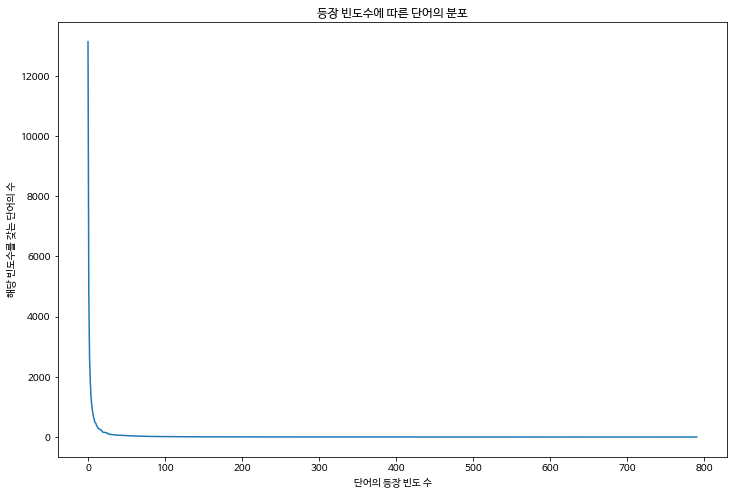

In [91]:
words_distribution = clean_frequencies.value_counts()
plt.figure(figsize=(12,8))
plt.plot(range(0,len(words_distribution)), words_distribution.values)
plt.ylabel("해당 빈도수를 갖는 단어의 수")
plt.xlabel("단어의 등장 빈도 수")
plt.title("등장 빈도수에 따른 단어의 분포")
plt.show()

- 그래프를 살펴보면 빈도수가 높아질 수록 해당하는 단어의 수도 줄어든다.
- 빈도수가 낮은 단어의 수가 압도적으로 많으므로 단어 전체 분포를 설명하기 위해선 많은 단어가 필요하다.

## 등장 빈도가 적은 단어들을 단어 집합에서 제외

- 총 단어의 수를 확인해보자

In [93]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_token_list2)
len(tokenizer.word_index)

35738

- 몇 개의 희귀단어를 제거할 수 있는지 1 ~ 4개 이하로 제거했을 때 분포를 확인한다.

In [99]:
X_train = train.clean_tokens2 # train 데이터 문서 추출
y_train = train.change # train 데이터에서 라벨 추출

X_test = test.token_mecab # test 데이터 문서 추출
y_test = test.change      # test 데이터 라벨 추출

In [100]:
def check_frequency(num,tokenizer):
  threshold = num
  total_cnt = len(tokenizer.word_index) # 단어의 수
  rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
  total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
  rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
  for key, value in tokenizer.word_counts.items():
      total_freq += value

      # 단어의 등장 빈도수가 threshold보다 작으면
      if(value < threshold):
          rare_cnt += 1
          rare_freq += value

  print('단어 집합(vocabulary)의 크기 :',total_cnt)
  print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
  print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
  print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

  return total_cnt, rare_cnt
# 빈도 확인해보기
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

for threshold in range(2,6):
  check_frequency(threshold, tokenizer)
  print('-'*30)

단어 집합(vocabulary)의 크기 : 35738
등장 빈도가 1번 이하인 희귀 단어의 수: 12942
단어 집합에서 희귀 단어의 비율: 36.213554200011195
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.1593543376353006
------------------------------
단어 집합(vocabulary)의 크기 : 35738
등장 빈도가 2번 이하인 희귀 단어의 수: 17761
단어 집합에서 희귀 단어의 비율: 49.697800660361516
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 2.022733808051699
------------------------------
단어 집합(vocabulary)의 크기 : 35738
등장 빈도가 3번 이하인 희귀 단어의 수: 20355
단어 집합에서 희귀 단어의 비율: 56.95618109575242
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 2.7198513675848397
------------------------------
단어 집합(vocabulary)의 크기 : 35738
등장 빈도가 4번 이하인 희귀 단어의 수: 22149
단어 집합에서 희귀 단어의 비율: 61.97604790419161
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 3.3626829799222615
------------------------------


- 자연어 처리 과정에서 어휘 집합의 수를 약 2만개 정도 사용한다고 가정 시 최소 등장 빈도가 2 이상이면 단어 집합 크기가 작아질 우려가 있다.
- 따라서 등장 빈도가 1회 이하인 단어들은 정수 인코딩 과정에서 배제하도록 설계
- 전체 비중에서 1.15% 등장하는 빈도가 1회 이하인 단어들을 **정수 인코딩 과정에서 배제한다.** 

In [98]:
def check_frequency(num,tokenizer):
  threshold = num
  total_cnt = len(tokenizer.word_index) # 단어의 수
  rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
  total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
  rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
  for key, value in tokenizer.word_counts.items():
      total_freq += value

      # 단어의 등장 빈도수가 threshold보다 작으면
      if(value < threshold):
          rare_cnt += 1
          rare_freq += value

  print('단어 집합(vocabulary)의 크기 :',total_cnt)
  print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
  print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
  print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

  return total_cnt, rare_cnt
# 빈도 확인해보기
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

for threshold in range(2,6):
  check_frequency(threshold, tokenizer)
  print('-'*30)

단어 집합(vocabulary)의 크기 : 35738
등장 빈도가 1번 이하인 희귀 단어의 수: 12942
단어 집합에서 희귀 단어의 비율: 36.213554200011195
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.1593543376353006
------------------------------
단어 집합(vocabulary)의 크기 : 35738
등장 빈도가 2번 이하인 희귀 단어의 수: 17761
단어 집합에서 희귀 단어의 비율: 49.697800660361516
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 2.022733808051699
------------------------------
단어 집합(vocabulary)의 크기 : 35738
등장 빈도가 3번 이하인 희귀 단어의 수: 20355
단어 집합에서 희귀 단어의 비율: 56.95618109575242
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 2.7198513675848397
------------------------------
단어 집합(vocabulary)의 크기 : 35738
등장 빈도가 4번 이하인 희귀 단어의 수: 22149
단어 집합에서 희귀 단어의 비율: 61.97604790419161
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 3.3626829799222615
------------------------------


- 자연어 처리 과정에서 어휘 집합의 수를 약 2만개 정도 사용한다고 가정 시 최소 등장 빈도가 2 이상이면 단어 집합 크기가 작아질 우려가 있다.
- 따라서 등장 빈도가 1회 이하인 단어들은 정수 인코딩 과정에서 배제하도록 설계
- 전체 비중에서 1.0% 등장 빈도가 1회 이하인 단어들을 **정수 인코딩 과정에서 배제한다.** 

In [101]:
# 전체 단어 개수 중 빈도수 1 이하인 단어는 제거하기 위한 작업


# 빈도 확인해보기
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

threshold = 2
total_cnt, rare_cnt = check_frequency(threshold, tokenizer)
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

# tokenizer
myTokenizer = Tokenizer(vocab_size)
myTokenizer.fit_on_texts(X_train)
print(myTokenizer.index_word)

# 정수 sequences로 encoding
X_train = myTokenizer.texts_to_sequences(X_train)
X_test = myTokenizer.texts_to_sequences(X_test)

# check_data
print(X_train[0])
print(X_test[0])


단어 집합(vocabulary)의 크기 : 35738
등장 빈도가 1번 이하인 희귀 단어의 수: 12942
단어 집합에서 희귀 단어의 비율: 36.213554200011195
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.1593543376353006
단어 집합의 크기 : 22797
{1: '상승', 2: '하락', 3: '기관', 4: '미국', 5: '화학', 6: '중국', 7: '외국인', 8: '은행', 9: '현대', 10: '신한', 11: '경제', 12: '그룹', 13: '매수', 14: '트리', 15: '실적', 16: '분기', 17: '출시', 18: '하이닉스', 19: '카카오', 20: '반도체', 21: '종합', 22: '증권', 23: '사업', 24: '증시', 25: '인수', 26: '지주', 27: '판매', 28: '뉴스', 29: '영업', 30: '경영', 31: '주식', 32: '국내', 33: '포스코', 34: '산업', 35: '지수', 36: '공시', 37: '최고', 38: '글로벌', 39: '확대', 40: '최대', 41: '개최', 42: '회복', 43: '바이오', 44: '사장', 45: '돌파', 46: '매도', 47: '공장', 48: '규모', 49: 'tv', 50: '자동차', 51: '외인', 52: '세계', 53: '대표', 54: '지원', 55: '지속', 56: '올해', 57: '기술', 58: '업계', 59: '기아차', 60: '성장', 61: '강세', 62: '미래', 63: '배터리', 64: '일본', 65: '노조', 66: '전자', 67: '부회장', 68: '상장', 69: '개인', 70: '서울', 71: '매각', 72: '서비스', 73: '혁신', 74: '정부', 75: '해외', 76: '모바일', 77: '공개', 78: '전략', 79: '이재용', 80: '국민은행', 81: '개발', 82: '금리', 83: '연속',

In [102]:
# y 라벨 선언
y_train = np.array(train['change'])
y_test = np.array(test['change'])

### 빈 데이터 처리
- 어휘 집합 수의 제한으로 희귀 토큰으로만 구성된 헤드라인은 토크나이징이 되기에 결측치를 처리
- 기존 데이터 삭제

In [103]:
len(X_train), len(y_train)

(188501, 188501)

In [106]:
# 길이가 0인 샘플들의 인덱스 반환
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]
drop_test = [index for index, sentence in enumerate(X_test) if len(sentence) < 1]
print(f'빈 train 개수 : {len(drop_train)}')
print(f'빈 test 개수 : {len(drop_test)}')

빈 train 개수 : 115
빈 test 개수 : 31


train, test 모두 빈 샘플들을 제거한다.

In [107]:
# 빈 샘플들을 제거
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
X_test = np.delete(X_test, drop_test, axis=0)
y_test = np.delete(y_test, drop_test, axis=0)
len(X_train), len(X_test)

(188386, 45141)

### 패딩
- 서로 다른 길이의 샘플들의 길이를 동일하게 맞춰줘야 함

헤드라인의 최대 길이 : 21
헤드라인의 평균 길이 : 5.856958585032858


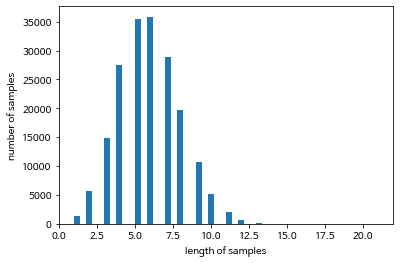

In [108]:
print('헤드라인의 최대 길이 :',max(len(review) for review in X_train))
print('헤드라인의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

- 가장 긴 헤드라인의 길이는 21, 평균은 약 5.8정도이다.
- X_train, X_test 모두 병렬 연산을 위해 문장의 길이를 통일해 주어야 함

In [110]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

- 분포를 확인했을 때 전체 12 이하인 샘플의 비율이 99%이상이면서 전체 데이터의 0.02이하의 손실을 나타내는 것으로 고려하여 max_len을 12로 설정한다

In [113]:
for max_len in range(10,15):
  below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 10 이하인 샘플의 비율: 98.31940802395083
전체 샘플 중 길이가 11 이하인 샘플의 비율: 99.43944879131146
전체 샘플 중 길이가 12 이하인 샘플의 비율: 99.8375675474823
전체 샘플 중 길이가 13 이하인 샘플의 비율: 99.95753399934178
전체 샘플 중 길이가 14 이하인 샘플의 비율: 99.98035947469558


In [114]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

## gru 모델링
- 일단은 baseline
- 하이퍼파라미터인 임베딩 벡터의 차원은 100, 은닉 상태의 크기는 128
- 출력은 상승 or 하락 중 하나를 예측하는 이진 분류
- 출력층의 활성화함수는 이진분류이므로 시그모이드 사용
- 손실함수는 크로스 엔트로피
- 배치 크기: 64, 에폭: 15

- EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)는 검증 데이터 손실(val_loss)이 증가하면, 과적합 징후므로 검증 데이터 손실이 4회 증가하면 정해진 에포크가 도달하지 못하였더라도 학습을 조기 종료(Early Stopping)한다. 
- ModelCheckpoint를 사용하여 검증 데이터의 정확도(val_acc)가 이전보다 좋아질 경우에만 모델을 저장한다.
- validation_split=0.2을 사용하여 훈련 데이터의 20%를 검증 데이터로 분리해서 사용하고, 검증 데이터를 통해서 훈련이 적절히 되고 있는지 확인한다. 
- 검증 데이터는 기계가 훈련 데이터에 과적합되고 있지는 않은지 확인하기 위한 용도로 사용된다.


In [115]:
from tensorflow.keras.layers import Embedding, Dense, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(GRU(hidden_units))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Epoch 1/15
2354/2355 [============================>.] - ETA: 0s - loss: 0.6859 - acc: 0.5459
Epoch 00001: val_acc improved from -inf to 0.52951, saving model to best_model.h5
2355/2355 [==============================] - 105s 44ms/step - loss: 0.6858 - acc: 0.5459 - val_loss: 0.6902 - val_acc: 0.5295
Epoch 2/15
2354/2355 [============================>.] - ETA: 0s - loss: 0.6658 - acc: 0.5964
Epoch 00002: val_acc did not improve from 0.52951
2355/2355 [==============================] - 91s 39ms/step - loss: 0.6658 - acc: 0.5964 - val_loss: 0.7026 - val_acc: 0.5162
Epoch 3/15
2354/2355 [============================>.] - ETA: 0s - loss: 0.6431 - acc: 0.6314
Epoch 00003: val_acc did not improve from 0.52951
2355/2355 [==============================] - 93s 39ms/step - loss: 0.6431 - acc: 0.6313 - val_loss: 0.7155 - val_acc: 0.5185
Epoch 4/15
2354/2355 [============================>.] - ETA: 0s - loss: 0.6171 - acc: 0.6622
Epoch 00004: val_acc did not improve from 0.52951
2355/2355 [=========

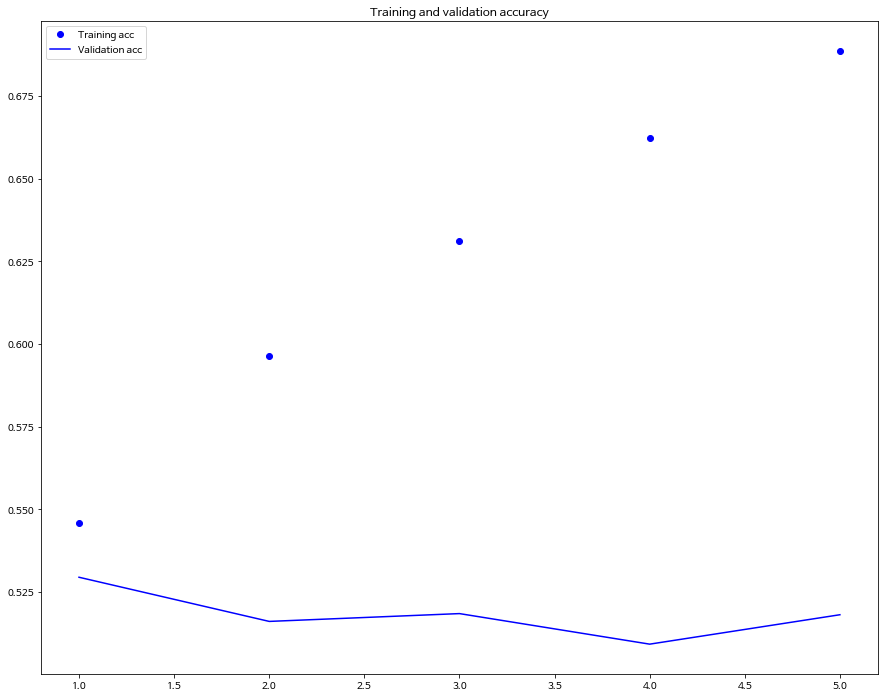

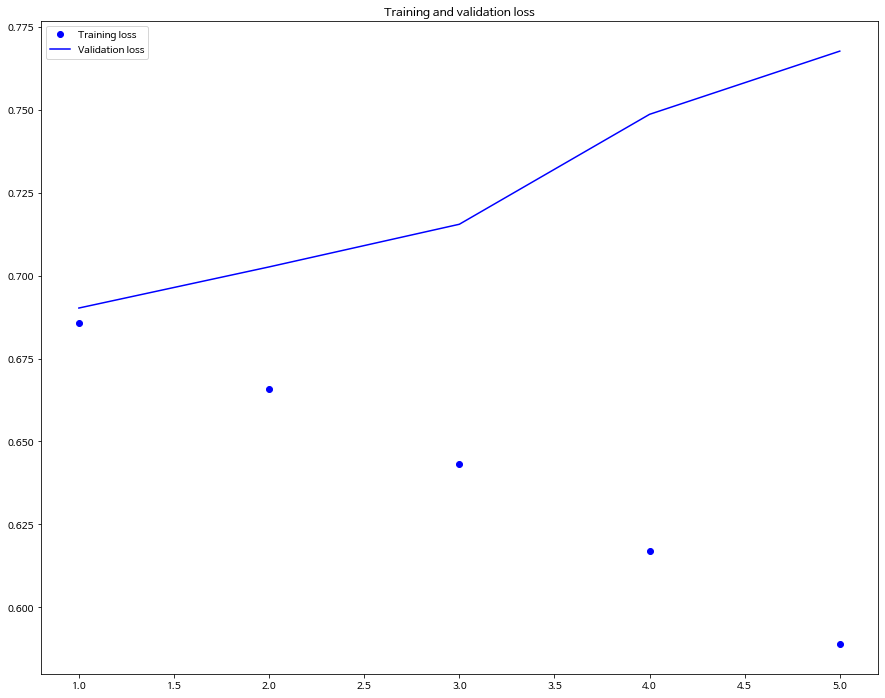

In [118]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(15,12))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure(figsize=(15,12))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### test set 평가 준비
- 예측기로서 동작할 수 있는 Selection Function을 만들어야함
- 특정날짜의 주가 기사문장이 N개라고 했을 때, N개의 문장의 감성 분류스코어를 계산한 확률평균을 그날 주식 종가의 업다운을 결정하는 예측 값으로 사용
- 문장 판별 확률의 평균으로 선택한 이유 -> 일반화된 테스트 데이터가 아님

In [119]:
loaded_model = load_model('best_model.h5') # best model 불러오기

In [120]:
score = loaded_model.predict(X_test)

In [127]:
loss = test.iloc[drop_test,]
loss[['name','change','date']]

,name,change,date
4586,NAVER,0,2020-03-19
7244,NAVER,1,2020-05-07
7981,셀트리온,1,2020-05-20
9140,NAVER,0,2020-06-09
9409,삼성전자,0,2020-06-12
10907,신한지주,0,2020-07-08
11970,셀트리온,0,2020-07-24
12415,NAVER,1,2020-08-03
15966,KB금융,1,2020-09-25
15994,POSCO,0,2020-09-28


In [130]:
print('원래 test set 수: ',len(test))
temp = test.drop(drop_test,axis=0,inplace=True)
print('31개 삭제한 test set 수: ',len(test))

원래 test set 수:  45172
31개 삭제한 test set 수:  45141


In [131]:
test['sentiment_prob'] = score
test.head()

,name,headline,date,change,token_mecab,sentiment_prob
0,카카오,"""기술 사대주의로는 AI 정복 힘들다""",2020-01-02,0,기술 사대주의 AI 정복 힘들,0.517778
1,카카오,[해설]中 디지털 종속 우려...동남아 국가 '中 QR결제 금지' 초강수,2020-01-02,0,해설 중국 디지털 종속 우려 동남아 국가 중국 QR 결제 금지 강수,0.488098
2,카카오,"씨티은행, 1.3%포인트 금리인하 직장인 신용대출..한달 연장 이벤트",2020-01-02,0,씨티 은행 포인트 금리 인하 직장 신용 대출 연장 이벤트,0.485674
3,카카오,'소비자분쟁 통지서' 카톡으로 제공된다,2020-01-02,0,소비자 분쟁 통지서 카톡 제공,0.430201
4,카카오,[이슈분석]키 잡은 공정위…배민-DH 합병 경우의 수,2020-01-02,0,이슈 분석 공정위 배민 DH 합병 경우,0.415983


In [132]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45141 entries, 0 to 45171
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   name            45141 non-null  object        
 1   headline        45141 non-null  object        
 2   date            45141 non-null  datetime64[ns]
 3   change          45141 non-null  int64         
 4   token_mecab     45141 non-null  object        
 5   sentiment_prob  45141 non-null  float32       
dtypes: datetime64[ns](1), float32(1), int64(1), object(3)
memory usage: 2.2+ MB


In [133]:
for name in test['name'].unique():
    print(name)

카카오
SK하이닉스
KB금융
신한지주
삼성전자
셀트리온
현대차
LG화학
POSCO
NAVER


In [134]:
len(test['date'].unique())

496

In [136]:
from tqdm import tqdm

stock_prob_list = []
for name in tqdm(test['name'].unique()): # 10개 종목
    temp_list = []
    for date in tqdm(test['date'].unique()): # 일자 별
        avg_prob = np.mean(test[(test['date'] == date) & (test['name'] == name)]['sentiment_prob']) # 일자별 감성 확률 평균 값
        temp_list.append(avg_prob)  
    stock_prob_list.append(temp_list)

100%|██████████| 10/10 [00:34<00:00,  3.46s/it]


In [179]:
result_df = pd.DataFrame({'카카오': stock_prob_list[0]}, index=test['date'].unique())

for idx, name in enumerate(test['name'].unique()[1:]):
    result_df[name] = stock_prob_list[idx + 1]

In [180]:
result_df.sort_index(inplace=True)

In [181]:
result_df.tail()

,카카오,SK하이닉스,KB금융,신한지주,삼성전자,셀트리온,현대차,LG화학,POSCO,NAVER
2021-12-24,0.483685,0.469599,0.396670,0.476811,0.513363,0.522193,0.473591,0.480686,0.401633,0.533968
2021-12-27,0.464059,0.474450,0.449930,NaN,0.449158,0.406064,0.451571,0.461955,0.456366,0.412920
2021-12-28,0.469804,0.490510,0.426207,0.378040,0.436907,0.517321,0.481420,0.449395,0.508840,0.433421
2021-12-29,0.470221,0.465755,0.445307,0.506570,0.480217,0.513790,0.429682,0.425455,0.451152,0.395651
2021-12-30,0.485592,0.483557,0.450552,0.465977,0.471964,0.472342,0.447799,0.463392,0.448571,0.409336


In [182]:
result_df.isnull().sum()

카카오         0
SK하이닉스      1
KB금융        4
신한지주       83
삼성전자        3
셀트리온        1
현대차         1
LG화학        1
POSCO     137
NAVER       6
dtype: int64

In [183]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 496 entries, 2020-01-02 to 2021-12-30
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   카카오     496 non-null    float64
 1   SK하이닉스  495 non-null    float64
 2   KB금융    492 non-null    float64
 3   신한지주    413 non-null    float64
 4   삼성전자    493 non-null    float64
 5   셀트리온    495 non-null    float64
 6   현대차     495 non-null    float64
 7   LG화학    495 non-null    float64
 8   POSCO   359 non-null    float64
 9   NAVER   490 non-null    float64
dtypes: float64(10)
memory usage: 42.6 KB


- 널 값을 label값과 병합 후에 처리하자

### 종목별 정답 mapping df 생성

In [184]:
change = pd.read_csv('/content/drive/MyDrive/final_project/ten_change.csv', index_col=0)
change.tail()

,date,change,name
24725,2022-01-10,1,신한지주
24726,2022-01-11,1,신한지주
24727,2022-01-12,1,신한지주
24728,2022-01-13,0,신한지주
24729,2022-01-14,0,신한지주


In [185]:
change['date'] = pd.to_datetime(change['date'])

split_date = pd.to_datetime('2020-01-01')
end_date = pd.to_datetime('2021-12-30')

change_test = change[(change['date'] >= split_date) & (change['date'] <= end_date)]

In [186]:
change_test

,date,change,name
1967,2020-01-02,0,삼성전자
1968,2020-01-03,1,삼성전자
1969,2020-01-06,0,삼성전자
1970,2020-01-07,1,삼성전자
1971,2020-01-08,1,삼성전자
...,...,...,...
24715,2021-12-24,0,신한지주
24716,2021-12-27,0,신한지주
24717,2021-12-28,1,신한지주
24718,2021-12-29,0,신한지주


In [164]:
change_df = pd.DataFrame({'삼성전자': change_test[change_test['name'] == '삼성전자']['change'].values}, index=change_test['date'].unique())
change_df.head()

,삼성전자
2020-01-02,0
2020-01-03,1
2020-01-06,0
2020-01-07,1
2020-01-08,1


In [187]:
for name in change_test['name'].unique()[1:]:
    change_df[name] = change_test[change_test['name'] == name]['change'].values

In [188]:
change_df.tail()

,삼성전자,SK하이닉스,NAVER,LG화학,현대차,카카오,셀트리온,POSCO,KB금융,신한지주
2021-12-24,1,1,1,0,1,1,0,1,0,0
2021-12-27,0,0,0,1,0,0,1,0,0,0
2021-12-28,1,1,1,1,1,1,1,1,1,1
2021-12-29,0,0,0,0,0,1,0,0,0,0
2021-12-30,0,1,0,0,0,0,0,0,0,0


## 종목별 예측값, 정답 병합
    

In [189]:
change_df.columns

Index(['삼성전자', 'SK하이닉스', 'NAVER', 'LG화학', '현대차', '카카오', '셀트리온', 'POSCO',
       'KB금융', '신한지주'],
      dtype='object')

In [190]:
# 각각 데이터프레임 생성

ten_df = []
def make_per_df(name):
  df = pd.DataFrame({'predict':result_df[name],'label': change_df[name]}, index = test['date'].unique())
  df['name'] = name
  df = df.sort_index()
  df.dropna(subset=['predict'],inplace=True)
  return df

def labeling(df):
  df['predict'][df['predict'] < 0.5] = 0
  df['predict'][df['predict'] >= 0.5] = 1
  return df


names = change_df.columns

for name in names:
  df = make_per_df(name)
  label_df = labeling(df)
  ten_df.append(label_df)


In [195]:
ten_df[3]

,predict,label,name
2020-01-02,0.0,0,LG화학
2020-01-03,0.0,0,LG화학
2020-01-06,0.0,0,LG화학
2020-01-07,0.0,1,LG화학
2020-01-08,0.0,0,LG화학
...,...,...,...
2021-12-24,0.0,0,LG화학
2021-12-27,0.0,1,LG화학
2021-12-28,0.0,1,LG화학
2021-12-29,0.0,0,LG화학


In [176]:
ten_df[2]

,predict,label,name
2020-01-02,0.0,0,NAVER
2020-01-03,0.0,0,NAVER
2020-01-06,0.0,0,NAVER
2020-01-07,1.0,1,NAVER
2020-01-08,0.0,0,NAVER
...,...,...,...
2021-12-24,1.0,1,NAVER
2021-12-27,0.0,0,NAVER
2021-12-28,0.0,1,NAVER
2021-12-29,0.0,0,NAVER


In [196]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
%matplotlib inline

In [197]:
acc_list = []
company = ['samsung elec', 'sk hynix', 'naver', 'lg chem', 'hyundai car', 'kakao', 'celtrion', 'posco', 'kb finance', 'shinhan']
for df in ten_df:
  acc_list.append(accuracy_score(df['label'], df['predict']))

In [198]:
acc_df = pd.DataFrame({'company': company, 'accuracy': acc_list})
acc_df.set_index('company', inplace=True)

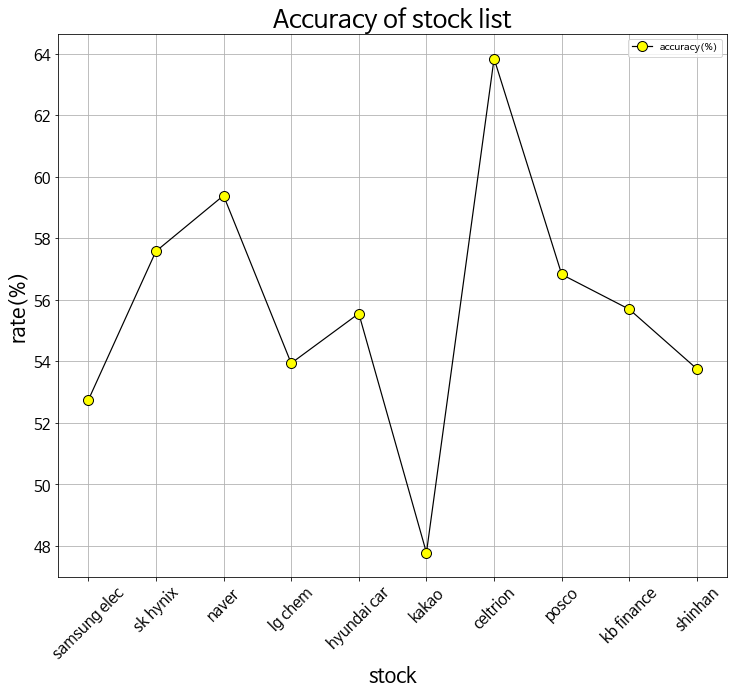

In [199]:
plt.figure(figsize=(12, 10))
plt.plot(acc_df.index, acc_df['accuracy'] * 100,
         label='accuracy(%)',
         linestyle='-',
         linewidth=1.2,
         color='black',
         marker='o',
         markersize=10,
         markerfacecolor='yellow',
         markeredgecolor='black'
)

plt.title('Accuracy of stock list', size=25)
plt.xlabel("stock", size=20)
plt.ylabel("rate(%)", size=20)
plt.xticks(fontsize=15, rotation=45)
plt.yticks(fontsize=15)
plt.grid()
plt.legend(loc='best')
plt.show()

## 종목별 confusion matrix, classification_report

In [201]:
ten_df[0].name.unique()[0]

'삼성전자'

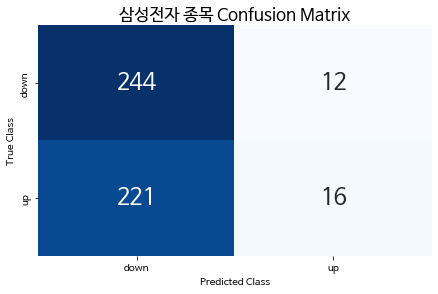

              precision    recall  f1-score   support

        down       0.52      0.95      0.68       256
          up       0.57      0.07      0.12       237

    accuracy                           0.53       493
   macro avg       0.55      0.51      0.40       493
weighted avg       0.55      0.53      0.41       493



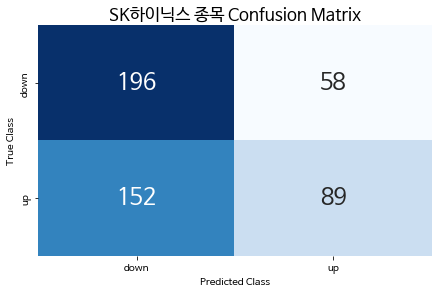

              precision    recall  f1-score   support

        down       0.56      0.77      0.65       254
          up       0.61      0.37      0.46       241

    accuracy                           0.58       495
   macro avg       0.58      0.57      0.55       495
weighted avg       0.58      0.58      0.56       495



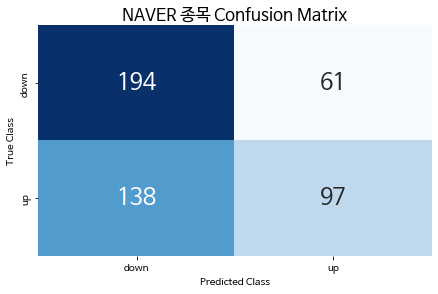

              precision    recall  f1-score   support

        down       0.58      0.76      0.66       255
          up       0.61      0.41      0.49       235

    accuracy                           0.59       490
   macro avg       0.60      0.59      0.58       490
weighted avg       0.60      0.59      0.58       490



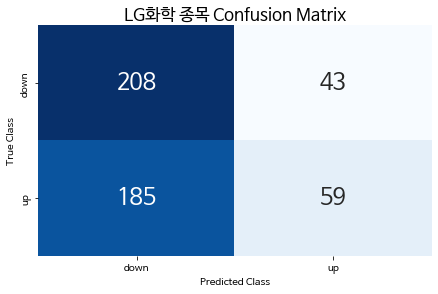

              precision    recall  f1-score   support

        down       0.53      0.83      0.65       251
          up       0.58      0.24      0.34       244

    accuracy                           0.54       495
   macro avg       0.55      0.54      0.49       495
weighted avg       0.55      0.54      0.50       495



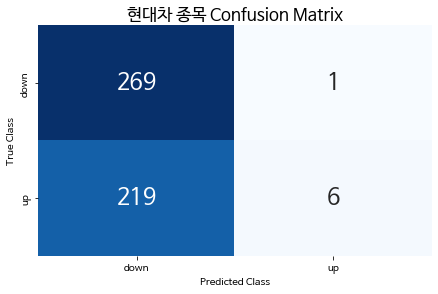

              precision    recall  f1-score   support

        down       0.55      1.00      0.71       270
          up       0.86      0.03      0.05       225

    accuracy                           0.56       495
   macro avg       0.70      0.51      0.38       495
weighted avg       0.69      0.56      0.41       495



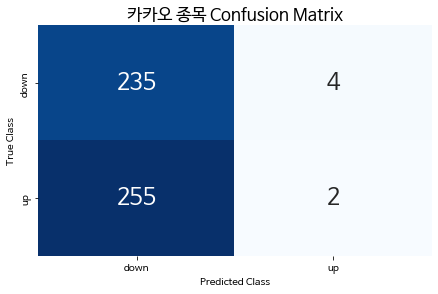

              precision    recall  f1-score   support

        down       0.48      0.98      0.64       239
          up       0.33      0.01      0.02       257

    accuracy                           0.48       496
   macro avg       0.41      0.50      0.33       496
weighted avg       0.40      0.48      0.32       496



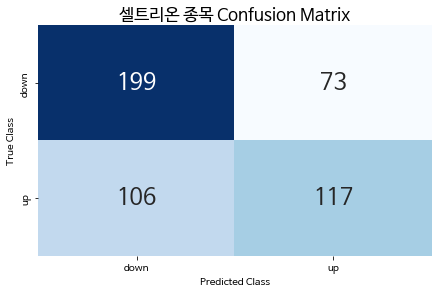

              precision    recall  f1-score   support

        down       0.65      0.73      0.69       272
          up       0.62      0.52      0.57       223

    accuracy                           0.64       495
   macro avg       0.63      0.63      0.63       495
weighted avg       0.64      0.64      0.63       495



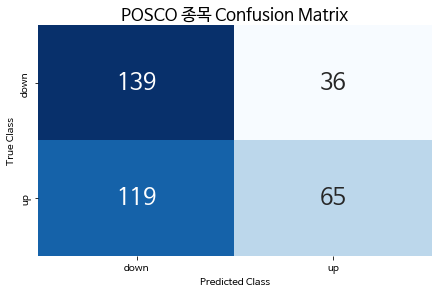

              precision    recall  f1-score   support

        down       0.54      0.79      0.64       175
          up       0.64      0.35      0.46       184

    accuracy                           0.57       359
   macro avg       0.59      0.57      0.55       359
weighted avg       0.59      0.57      0.55       359



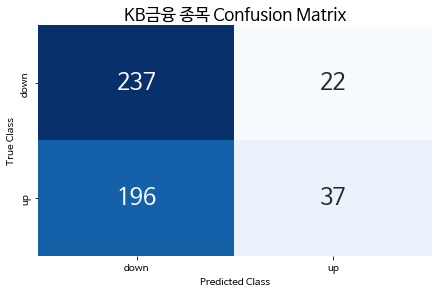

              precision    recall  f1-score   support

        down       0.55      0.92      0.68       259
          up       0.63      0.16      0.25       233

    accuracy                           0.56       492
   macro avg       0.59      0.54      0.47       492
weighted avg       0.59      0.56      0.48       492



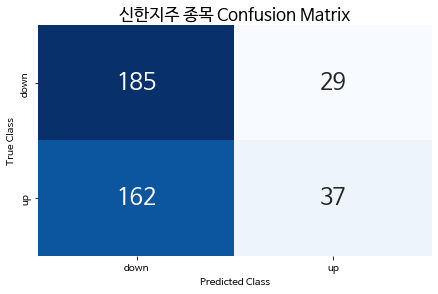

              precision    recall  f1-score   support

        down       0.53      0.86      0.66       214
          up       0.56      0.19      0.28       199

    accuracy                           0.54       413
   macro avg       0.55      0.53      0.47       413
weighted avg       0.55      0.54      0.48       413



In [208]:
def make_confusion_matrix(df):
  matrix = confusion_matrix(df.label, df.predict)
  class_names = ['down', 'up']
  dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)

  sns.heatmap(dataframe, annot=True, annot_kws = {'size' : 23}, fmt='d', cbar=None, cmap='Blues')
  name = df.name.unique()[0]
  plt.title(f'{name} 종목 Confusion Matrix',size=17)
  plt.tight_layout()
  plt.ylabel('True Class')
  plt.xlabel('Predicted Class')
  plt.show()
  print(classification_report(df.label, df.predict, target_names=class_names))

for df in ten_df:
  make_confusion_matrix(df)

In [213]:
#acc_list = []; 
precision_up = []; precision_down = []
company = ['samsung elec', 'sk hynix', 'naver', 'lg chem', 'hyundai car', 'kakao', 'celtrion', 'posco', 'kb finance', 'shinhan']
for df in ten_df:
  #acc_list.append(accuracy_score(df['label'], df['predict']))
  precision_up.append(precision_score(df['label'], df['predict'],pos_label=1))
  precision_down.append(precision_score(df['label'], df['predict'],pos_label=0))

In [214]:
pre_up = pd.DataFrame({'company': company, 'precision': precision_up})
pre_down = pd.DataFrame({'company': company, 'precision': precision_down})
pre_up.set_index('company', inplace=True)
pre_down.set_index('company', inplace=True)

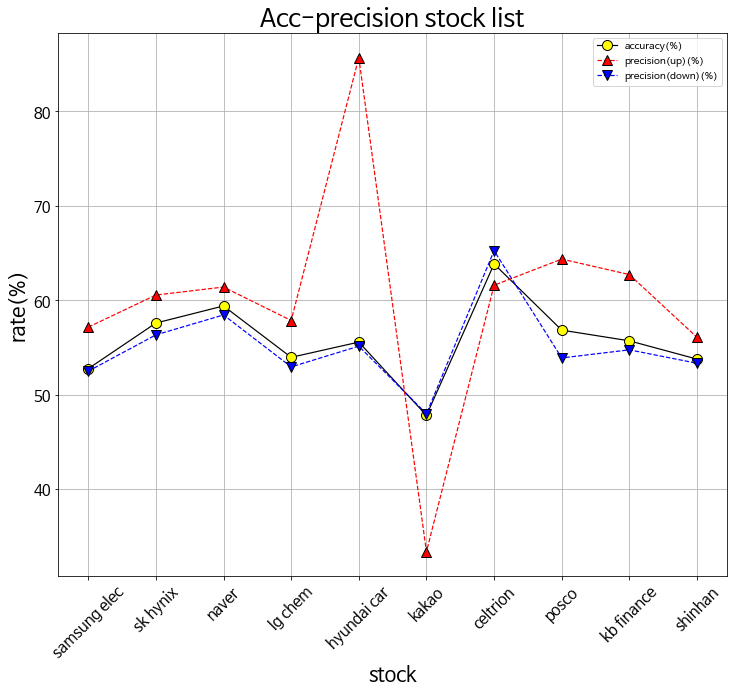

In [216]:
plt.figure(figsize=(12, 10))
plt.plot(acc_df.index, acc_df['accuracy'] * 100,
         label='accuracy(%)',
         linestyle='-',
         linewidth=1.2,
         color='black',
         marker='o',
         markersize=10,
         markerfacecolor='yellow',
         markeredgecolor='black'
)

plt.plot(pre_up.index, pre_up['precision'] * 100,
         label='precision(up)(%)',
         linestyle='--',
         linewidth=1.2,
         color='red',
         marker='^',
         markersize=10,
         markerfacecolor='red',
         markeredgecolor='black'
)

plt.plot(pre_down.index, pre_down['precision'] * 100,
         label='precision(down)(%)',
         linestyle='--',
         linewidth=1.2,
         color='blue',
         marker='v',
         markersize=10,
         markerfacecolor='blue',
         markeredgecolor='black'
)

plt.title('Acc-precision stock list', size=25)
plt.xlabel("stock", size=20)
plt.ylabel("rate(%)", size=20)
plt.xticks(fontsize=15, rotation=45)
plt.yticks(fontsize=15)
plt.grid()
plt.legend(loc='best')
plt.show()

- accuracy : 전체 데이터에서 제대로 예측했는지 지표
- precision : 모델이 1이라고 예측한 데이터 중 실제 1인 데이터의 비율
- recall : 실제 1인 데이터에서 1이라고 예측한 데이터의 비율